# Part 1: The Ideal Case

 The calculated value for when the mass hits the bottom of the shaft using the no drag equation is 28.55686245854129s and the value of when the mass hits the bottom calculated by solve_ivp is 28.556862458541282s. They are off by 7.105427357601002e-15s.


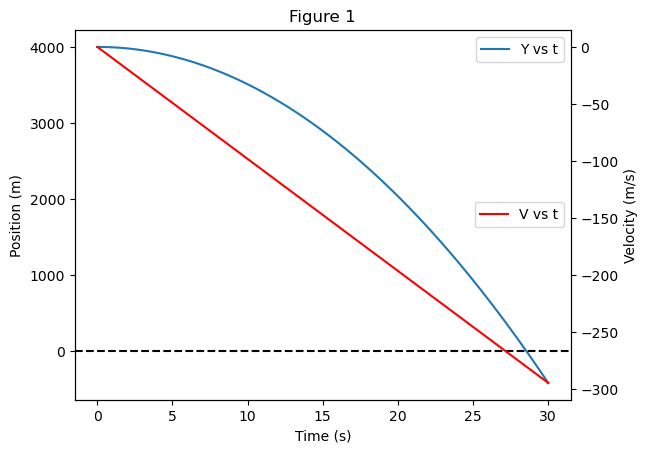

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
# 1. 
y = 4000
G0 = 9.81
a = 0
L = 2
t_no_drag = lambda y: np.sqrt(2*y/G0)

t1 = t_no_drag(y)


def f(t,s,a,g):
    y,v = s

    dydt = v
    dvdt = -g-a*(v)**L
    return dydt,dvdt

def bottom(t,s,a,g):
   
    return s[0]
t_eval = np.linspace(0,30,100)
soln = solve_ivp(f,(0,30),(4000,0),args = (a,G0), t_eval = t_eval, events = bottom)



t = soln.t
y = soln.y[0]
v = soln.y[1]

fig, ax = plt.subplots()
ax2 = ax.twinx()

ax.plot(t,y, label = "Y vs t")
ax2.plot(t,v,label = "V vs t", color = "red")
ax.axhline(0.0, color = 'black', ls = '--')
ax.set_xlabel("Time (s)")
ax.set_ylabel("Position (m)")
ax2.set_ylabel("Velocity (m/s)")


ax.set_title("Figure 1")

ax.legend()
ax2.legend(loc = 5)

print(f" The calculated value for when the mass hits the bottom of the shaft using the no drag equation is {t1}s and the value of when the mass hits the bottom calculated by solve_ivp is {soln.t_events[0][0]}s. They are off by {t1-soln.t_events[0][0]}s.")

# Part 2: Including Drag and a Variable *g*

 The calculated value for when the mass hits the bottom of the shaft using the no drag equation and varing g is 28.565821333903582s and the value of when the mass hits the bottom calculates by solve_ivp is 28.56582133390675s. They are off by 3.169020601490047e-12s.
 Using a height dependent g effects the fall time by 0.0089588753654688s
 The calculated value for when the mass hits the bottom of the shaft using drag coefficient a = 0.004 is 84.29317445698527s.


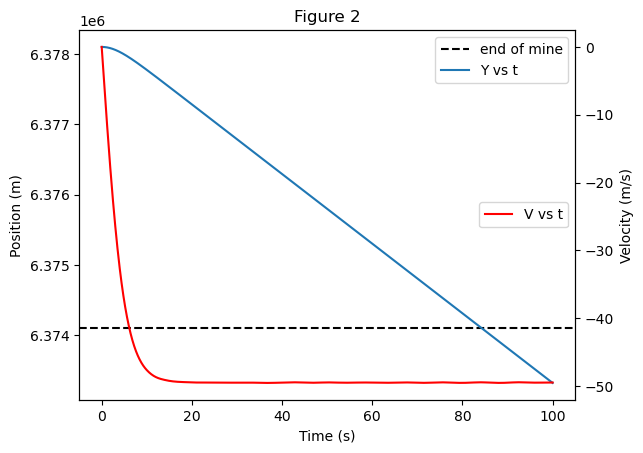

In [2]:
Re = 6.3781e6

def g(y):
    return G0*(y/Re)
    
t_no_drag = lambda y: np.sqrt(2*y/g(Re-y))
t2 = t_no_drag(4000)


def f(t,s,a,x):
    y,v = s

    dydt = v
    dvdt = -g(Re-x)+a*(np.abs(v))**L
    return dydt,dvdt
def bottom(t,s,a,x):
    
    return s[0]-(Re-4000)
    

t_eval = np.linspace(0,30,100)
soln1 = solve_ivp(f,(0,30),(Re,0),args = (0,4000), t_eval = t_eval,events = bottom)



t = soln1.t
y = soln1.y[0]
v = soln1.y[1]

fig, ax = plt.subplots()

ax2 = ax.twinx()


ax.axhline(Re-4000, color = 'black', ls = '--', label = 'end of mine')
ax.set_xlabel("Time (s)")
ax.set_ylabel("Position (m)")
ax2.set_ylabel("Velocity (m/s)")


ax.set_title("Figure 2")



print(f" The calculated value for when the mass hits the bottom of the shaft using the no drag equation and varing g is {t2}s and the value of when the mass hits the bottom calculates by solve_ivp is {soln1.t_events[0][0]}s. They are off by {np.abs(t2-soln1.t_events[0][0])}s.")

# 2
print(f" Using a height dependent g effects the fall time by {np.abs(soln1.t_events[0][0]-soln.t_events[0][0])}s")

#3
a = 0.004
t_eval = np.linspace(0,100,1000)
soln2 = solve_ivp(f,(0,100),(Re,0),args = (a,4000), t_eval = t_eval,events = bottom)



t = soln2.t
y = soln2.y[0]
v = soln2.y[1]

ax.plot(t,y, label = "Y vs t")
ax2.plot(t,v,label = "V vs t", color = "red")

ax.legend()
ax2.legend(loc = 5)
plt.savefig(" Figure 2.png")
print(f" The calculated value for when the mass hits the bottom of the shaft using drag coefficient a = {a} is {soln2.t_events[0][0]}s.")


# Part 3: The Coriolis Force

The test mass does not reach the bottom as the mass hits the wall at 21.91141137751552s
Drag makes a dfference as it takes 21.91141137751552s for the mass to hit the wall without drag, and 29.72950940637526s with drag


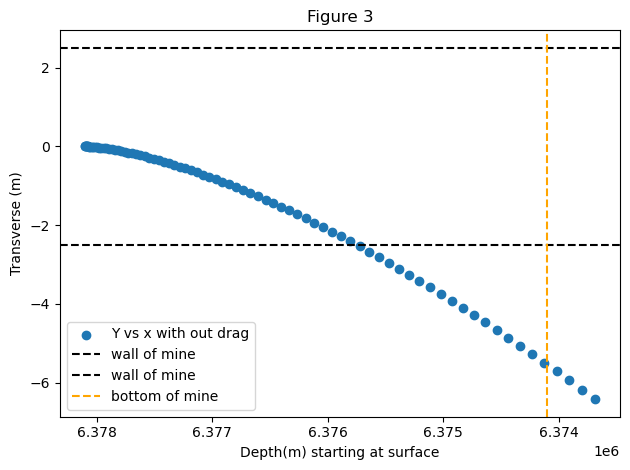

In [3]:
Omega = 7.272E-5
a = 0.004
L = 2
##1
def h(t,s,a,j):
     y, v_y,x,v_x= s
     
     dydt = v_y
     dv_ydt = -g(Re - j) -2 * Omega *v_x + a*(np.abs(v_y))**L
     dxdt = v_x
     dv_xdt = 2*Omega*v_y + a*(np.abs(v_x))**L
   
   

     return dydt, dv_ydt,dxdt,dv_xdt

##2

def wall(t,s,a,j):
    
    return s[2] + 2.5
fig,ax = plt.subplots(1,1)
t_eval = np.linspace(0,30,80)
soln4 = solve_ivp(h,(0,30),(Re,0,0,0),args = (0,4000), t_eval = t_eval,rtol = 1e-9, events = wall)
soln5 = solve_ivp(h,(0,30),(Re,0,0,0),args = (a,4000), t_eval = t_eval,rtol = 1e-9, events = wall)


t = soln4.t
y = soln4.y[0] 
x = soln4.y[2]  


ax.scatter(y,x,label = 'Y vs x with out drag')

ax.axhline(-2.5, ls = '--', color = 'black', label = 'wall of mine')
ax.axhline(2.5, ls = '--', color = 'black', label = 'wall of mine')
ax.axvline(Re-4000,ls = '--',color = 'orange', label = 'bottom of mine')
ax.invert_xaxis()
ax.legend()
ax.set_title("Figure 3")
ax.set_ylabel("Transverse (m)")
ax.set_xlabel("Depth(m) starting at surface")
fig.tight_layout()

plt.savefig(" Figure 3.png")
##3

    
print(f"The test mass does not reach the bottom as the mass hits the wall at {soln4.t_events[0][0]}s")

##4
print(f"Drag makes a dfference as it takes {soln4.t_events[0][0]}s for the mass to hit the wall without drag, and {soln5.t_events[0][0]}s with drag")


# Part 4: An infinitly deep mine

The test mass will make it all the way through the earth in 2533.1507222632563s
The test mass will be reach the center of the earth in 1266.5753611491432s achieving a speed of -7910.067061560709 m/s
The Orbital speed of the earth is 7905.277129890415 m/s
The orbital preiod of the earth is 5069.371199675785s
The crossing time for the test mass of 2533.1507222632563s is around half of the orbital period the object of 5069.371199675785s


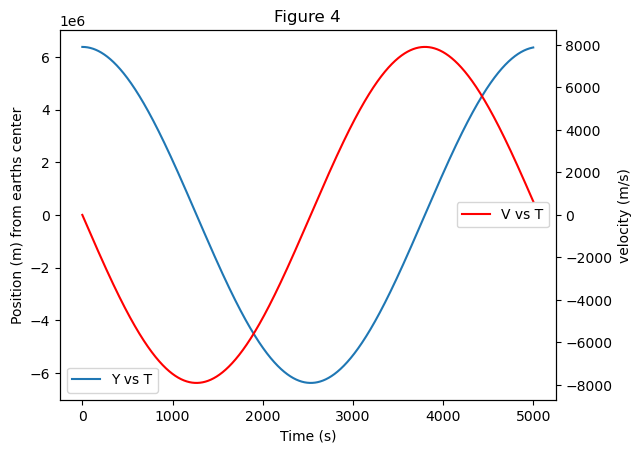

In [4]:
##1

def g(y):
    return G0*(y/Re)
    

def f2(t,s,a):
    y,v = s

    dydt = v
    dvdt = -g(y)+a*(np.abs(v))**L

    
    return dydt,dvdt
t_eval = np.linspace(0,5000,1000000)
soln5 = solve_ivp(f2,(0,5000), (Re,0),args = (0,), t_eval = t_eval)

t = soln5.t
y = soln5.y[0]
v = soln5.y[1]

fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(t,y, label = "Y vs T")
ax2.plot(t,v,label = "V vs T", color = 'red')
ax.legend()
ax2.legend(loc = 5)
ax.set_title('Figure 4')
ax.set_xlabel("Time (s)")
ax.set_ylabel("Position (m) from earths center")
ax2.set_ylabel("velocity (m/s)")



##2

def through(t,s,a):
    
    return s[1]
def center(t,s,a):
    return s[0]
soln5 = solve_ivp(f2,(0,5000), (Re,0),args = (0,), t_eval = t_eval, events = (through, center), rtol = 1e-9)

print(f"The test mass will make it all the way through the earth in {soln5.t_events[0][1]}s")
print(f"The test mass will be reach the center of the earth in {soln5.t_events[1][0]}s achieving a speed of {-soln5.y_events[1][1][1]} m/s")


##3
G = 6.6743E-11
Me = 5.972e24

Vt = np.sqrt(G*Me/Re)
print( f"The Orbital speed of the earth is {Vt} m/s")

T = 2*np.pi*Re/Vt
print(F"The orbital preiod of the earth is {T}s")

print(f"The crossing time for the test mass of {soln5.t_events[0][1]}s is around half of the orbital period the object of {T}s")

## Part 4 number 2
Figure 4 shows an ocillatory relationship between V and Y as a function of time. This is most likly becuase as the mass goes from Re to the center the acceleration is getting weaker then from 0 to the opposite Re, acceleration is increasing but in the opposite direction


# Part 5: A non-uniform Earth

 When n = 0 the mass reached the center of the earth in 1267.2409534601447s reaching a speed of -7904.896001097716 m/s
 When n = 1 the mass reached the center of the earth in 1096.8914820025393s reaching a speed of -10435.990488230218 m/s
 When n = 2 the mass reached the center of the earth in 1035.13877542547s reaching a speed of -12206.232870827089 m/s
 When n = 9 the mass reached the center of the earth in 943.8748065601535s reaching a speed of -18382.14271920939 m/s


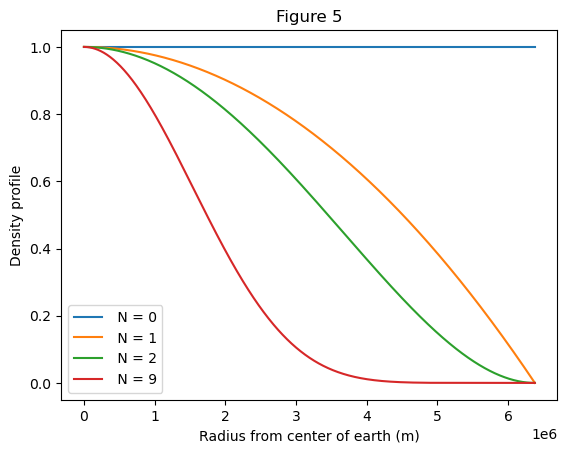

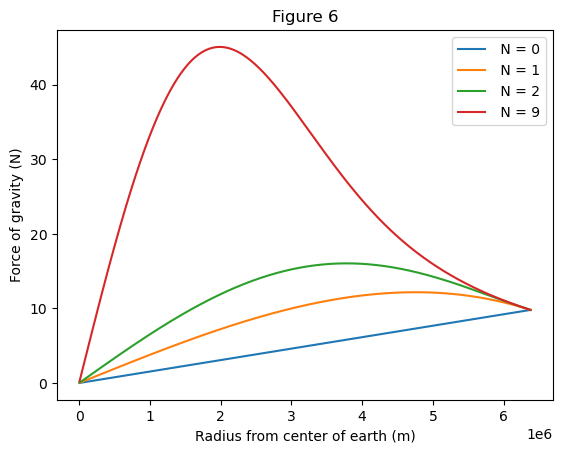

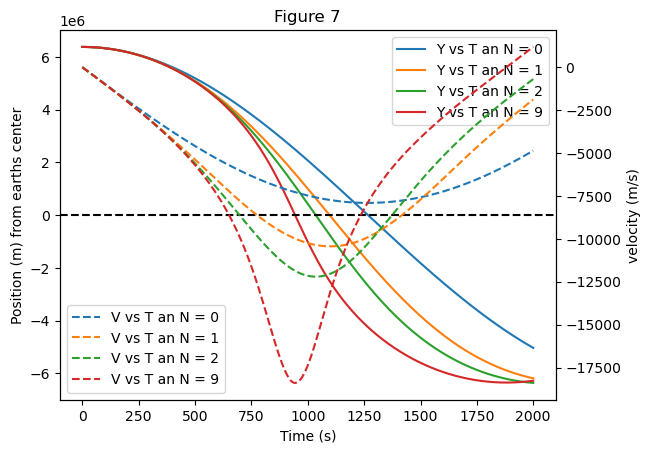

In [5]:
Pn = 1

def den1(r,n,Pn): # density function used to plot the normalized density
    return Pn*(1-(r**2/Re**2))**n



r = np.linspace(Re,0,1000)
nn = [0,1,2,9] # list of different Ns
fig,ax = plt.subplots()
for i in range(len(nn)): # graph of normalized density function with
    
    ax.plot(r,den1(r,nn[i],Pn),label = f" N = {nn[i]}")

#ax.invert_xaxis()
ax.legend()
ax.set_xlabel("Radius from center of earth (m)")
ax.set_ylabel("Density profile")
ax.set_title("Figure 5")


##2
from scipy.integrate import quad


def den2(r,n,Pn): # denity function that accumpanies R^2 for the mass integral
    return Pn*(1-(r**2/Re**2))**n*r**2
    
def den3(r,n): #Density function that does not have Pn used to calculate PN
    return (1-(r**2/Re**2))**n*r**2
    
def M(r,n,Pn): # Mass function in terms of radius, N, and Pn
   return 4*np.pi*quad(den2,0,r, args = (n,Pn))[0]


# print (G*M(1)/r**2)

def Fg(r,n,Pn):
    if np.isclose(r,0):
        return np.nan
    else:
        return G*M(r,n,Pn)/r**2
Pnn = [] # list of all the Pn values found
for i in range(len(nn)):
    Pnn.append(Me/(4*np.pi* quad(den3,0,Re,args = (nn[i],))[0])) # set Pn = to the Mass of earth divided by function given. This is neccesary to keep the mass of the earth constant.

                   
Fg_v = np.vectorize(Fg)
fig2,ax2 = plt.subplots()
for i in range(len(nn)):
    
    ax2.plot(r,Fg_v(r,nn[i],Pnn[i]),label = f" N = {nn[i]}")


ax2.legend()
ax2.set_xlabel("Radius from center of earth (m)")
ax2.set_ylabel("Force of gravity (N)")
ax2.set_title("Figure 6")

##3
t0,tf = 0,2000
t_eval = np.linspace(t0,tf,10000)
solns = []
def f3(t,s,n,Pn):
    y,v = s

    dydt = v
    dvdt = -Fg(y,n,Pn) 

    return dydt, dvdt
fig,ax = plt.subplots()
ax2 = ax.twinx()
color = ['purple','brown','cyan','black']
for i in range(len(nn)):
    
    soln = solve_ivp(f3,(t0,tf),(Re,0),args = (nn[i],Pnn[i]), t_eval = t_eval)
    t = soln.t
    y = soln.y[0]
    v = soln.y[1]

    ax.plot(t,y,label = F"Y vs T an N = {nn[i]}")
    ax2.plot(t,v,label = F"V vs T an N = {nn[i]}", ls = "--")


ax.legend()
ax2.legend(loc = 3)
ax.set_title("Figure 7")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Position (m) from earths center")
ax2.set_ylabel("velocity (m/s)")
ax.axhline(0,ls = "--", color = "black")
plt.savefig(" Figure 7.png")
##4
def through2(t,s,n,Pn):

    return s[1]
def center2(t,s,n,Pn):
    return s[0]

tf = 5000
t_eval = np.linspace(0,5000,10000)

for i in range(len(nn)):
    
    soln = solve_ivp(f3,(t0,tf),(Re,0),args = (nn[i],Pnn[i]), t_eval = t_eval, events = (through2, center2))
    print(f" When n = {nn[i]} the mass reached the center of the earth in {soln.t_events[1][0]}s reaching a speed of {-soln.y_events[1][1][1]} m/s")
   


# Part 6: A lunar mine shaft

In [6]:
Mm = 7.35e22
Rm = 1738100
a = 0
n = 0

def Gm(y):
    return G*Mm/Rm**2 *(y/Rm)

def FM(t,s,a):
    y,v = s

    dydt = v
    dvdt = -Gm(y)+a*(np.abs(v))**L

    
    return dydt,dvdt


def center(t,s,a):
    
    return s[0]
    
def through(t,s,a):
    return s[1]

t_eval = np.linspace(0,4000,10000)
soln = solve_ivp(FM,(0,4000), (Rm,0),args = (a,), t_eval = t_eval, events = (center,through))


print(f"The mass makes it to the center of the moon in {soln.t_events[0][0]}s and makes it all the way through the moon {soln.t_events[1][1]}s")

##2
VolE = (4/3*np.pi*Re**3)
VolM = (4/3*np.pi*Rm**3)
densityM = Mm/VolM
densityE = Me/VolE

print(f"Earth density: {densityE:.2f} kg/m^3")
print(f"Moon density: {densityM:.2f} kg/m^3")
print(f"Moon/Earth density ratio: {densityM/densityE:.4f}")

##3



The mass makes it to the center of the moon in 1624.9059919736478s and makes it all the way through the moon 3249.650523637166s
Earth density: 5494.87 kg/m^3
Moon density: 3341.75 kg/m^3
Moon/Earth density ratio: 0.6082


## Part 3

I chose to do this part on paper as it was fairly straight foward. I found that the orbital period is preportional to $$ \sqrt{\frac{1}{\rho}}$$ and the fall time is around half the orbital period.

Math:
$$ m \frac{v^2}{r} = \frac{GMm}{r^2} $$
I then simplfied the equation with some algebra to get:
$$ v = \sqrt{\frac{GM}{r}}$$
I then set v equal to $$ \frac{2\pi r}{T}$$ and solved for T:
$$ T_{orb} = \sqrt{\frac{4\pi r^3}{GM}}$$
I then set $$ M = \rho V$$ and got $$ T_{orb} = \sqrt{\frac{4\pi r^3}{G\rho V}}$$
Seeing as $$ V = \frac{4}{3} \pi r^3$$ this all symplifies to $$T_{orb} = \sqrt{\frac{3}{G\rho}}$$
so $$T_{orb}\propto \sqrt{\frac{1}{\rho}}$$ 
$$ T_{fall}\propto \sqrt{\frac{1}{4\rho}} $$
As you can see the trend of fall time being have the orbital time still tracks.